# A Replication of Tötsch, N. & Hoffmann, D. (2020). 'Classifier uncertainty: evidence, potential impact, and probabilistic treatment'

**Note**: the appearance of this notebook will depend on the environment and screen size you're using. If the tables are being clipped or the figures look off, consider trying Google Colab or Github via the buttons below. This notebook was created in VSCode, and will likely look best locally.

<a target="_blank" href="https://colab.research.google.com/github/ioverho/prob_conf_mat/blob/main/documentation/Explanation/totsch_replication.ipynb">
  <img alt="Static Badge" src="https://img.shields.io/badge/Run_in_Colab-_?style=for-the-badge&logo=googlecolab&labelColor=gray&color=1082c3&link=https%3A%2F%2Fgithub.com%2Fioverho%2Fprob_conf_mat%2Fblob%2Fmain%2Fdocumentation%2FExplanation/totsch_replication">
</a>
<a target="_blank" href="https://github.com/ioverho/prob_conf_mat/blob/main/documentation/Explanation/totsch_replication.ipynb">
  <img alt="Static Badge" src="https://img.shields.io/badge/View_in_Github-_?style=for-the-badge&logo=github&labelColor=gray&color=1082c3&link=https%3A%2F%2Fgithub.com%2Fioverho%2Fprob_conf_mat%2Fblob%2Fmain%2Fdocumentation%2FExplanation/totsch_replication">
</a>

In this notebook, we'll recreate all the figures presented in [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) using `prob_conf_mat`. While perfect replication is not possible, we'll see that all of the results are very similar to each other.

This is not entirely surprising, since the synthetic confusion matrix sampling in `prob_conf_mat` is a multiclass generalisation of the model presented in Tötsch & Hoffmann (2020).

Besides serving as a sanity check, it further showcases how the library might be used to generate custom figures and analyses.

## Preamble

First, some setup code. Tötsch & Hoffmann (2020) primarily use two different meta-datasets for their uncertainty quantification experiments. The first is a collection of *unrelated* binary classifiers, evaluated on relatively small datasets. It can be found under 'Table S1'.

The second meta-dataset used comes from a [Kaggle competition](https://www.kaggle.com/c/recursion-cellular-image-classification/overview). While the evaluation data is kept hidden, Tötsch & Hoffmann managed to reconstruct the sample size $N$, and the achieved accuracy scores from the public leaderboard. Since the evaluation metric is accuracy, we can just pretend the evaluation data and model responses are perfectly balanced, without affecting the analysis.

In [1]:
import pandas as pd


In [2]:
totsch_table_2 = [
    ["1", "10.1080/10629360903278800", "Table 2", 5, 0, 3, 0, 8, 10],
    ["2", "10.1021/ci200579f", "Table 3", 10, 0, 3, 1, 14, 48],
    ["3", "10.1021/ci020045", "Table 5", 6, 0, 7, 1, 14, 51],
    ["4a", "10.1155/2015/485864", "Table 4", 5, 1, 10, 1, 17, 10],
    ["4b", "10.1155/2015/485864", "Table 5", 4, 2, 10, 1, 17, 10],
    ["5a", "10.1016/j.ejmech.2010.11.029", "Table 6", 16, 1, 3, 2, 22, 86],
    ["5b", "10.1016/j.ejmech.2010.11.029", "Table 10", 8, 9, 4, 1, 22, 86],
    ["6a", "10.1016/j.vascn.2014.07.002", "Table 2", 2, 12, 19, 1, 34, 77],
    ["6b", "10.1016/j.vascn.2014.07.002", "Table 3", 10, 4, 20, 0, 34, 77],
    ["7a", "10.5935/0103-5053.20130066", "Table 2", 26, 0, 6, 2, 34, 61],
    ["7b", "10.5935/0103-5053.20130066", "Table 3", 24, 2, 6, 2, 34, 61],
    ["8", "10.1016/j.scitotenv.2018.05.081", "Table 2", 28, 9, 3, 4, 44, 18],
    ["9a", "10.4314/wsa.v36i4.58411", "Table 2", 19, 3, 18, 10, 50, 14],
    ["9b", "10.4314/wsa.v36i4.58411", "Table 2", 21, 1, 20, 8, 50, 14],
    ["10", "10.1016/j.bspc.2017.01.012", "Figure 2", 31, 5, 24, 4, 64, 80],
    ["11", "10.1039/C7MD00633K", "Figure 3", 40, 7, 15, 8, 70, 9],
    ["12", "10.3389/fnins.2018.01008", "Figure 3", 31, 9, 20, 13, 73, 1],
    ["13a", "10.4315/0362-028X-61.2.221", "Table 3", 79, 14, 19, 0, 112, 52],
    ["13b", "10.4315/0362-028X-61.2.221", "Table 3", 89, 4, 16, 3, 112, 52],
    ["14a", "10.1016/j.ancr.2014.06.005", "Figure 6.3", 136, 2, 2, 12, 152, 7],
    ["15a", "10.1016/j.saa.2016.09.028", "Table 2", 3, 12, 150, 0, 165, 65],
    ["15b", "10.1016/j.saa.2016.09.028", "Table 2", 6, 9, 150, 0, 165, 65],
    ["16", "10.1021/acs.analchem.7b00426", "Table 3", 188, 0, 13, 2, 203, 28],
    ["14b", "10.1016/j.ancr.2014.06.005", "Table 3", 253, 27, 11, 59, 350, 7],
]

totsch_table_2_df = pd.DataFrame.from_records(
    totsch_table_2,
    columns=["ID", "DOI", "Location", "TP", "FN", "TN", "FP", "N", "Citations"],
    index="ID",
)

totsch_table_2_df


,DOI,Location,TP,FN,TN,FP,N,Citations
ID,,,,,,,,
1,10.1080/10629360903278800,Table 2,5,0,3,0,8,10
2,10.1021/ci200579f,Table 3,10,0,3,1,14,48
3,10.1021/ci020045,Table 5,6,0,7,1,14,51
4a,10.1155/2015/485864,Table 4,5,1,10,1,17,10
4b,10.1155/2015/485864,Table 5,4,2,10,1,17,10
5a,10.1016/j.ejmech.2010.11.029,Table 6,16,1,3,2,22,86
5b,10.1016/j.ejmech.2010.11.029,Table 10,8,9,4,1,22,86
6a,10.1016/j.vascn.2014.07.002,Table 2,2,12,19,1,34,77
6b,10.1016/j.vascn.2014.07.002,Table 3,10,4,20,0,34,77


In [3]:
totsch_table_3 = [
    [1, "3467175", 0.99763, 15087, 36, 7544, 18, 18, 7544],
    [2, "3394520", 0.99672, 15073, 50, 7537, 25, 25, 7537],
    [3, "3338942", 0.99596, 15062, 61, 7531, 31, 31, 7531],
    [4, "3339018", 0.99512, 15049, 74, 7525, 37, 37, 7525],
    [5, "3338836", 0.99498, 15047, 76, 7524, 38, 38, 7524],
    [6, "3429037", 0.9938, 15029, 94, 7515, 47, 47, 7515],
    [7, "3346448", 0.99296, 15017, 106, 7509, 53, 53, 7509],
    [8, "3338664", 0.99296, 15017, 106, 7509, 53, 53, 7509],
    [9, "3338358", 0.99282, 15014, 109, 7507, 55, 55, 7507],
    [10, "3339624", 0.9924, 15008, 115, 7504, 58, 58, 7504],
]

totsch_table_3_df = pd.DataFrame.from_records(
    totsch_table_3,
    columns=["Rank", "TeamId", "Score", "TP+TN", "FP+FN", "TP", "FN", "FP", "TN"],
    index="Rank",
)

totsch_table_3_df


,TeamId,Score,TP+TN,FP+FN,TP,FN,FP,TN
Rank,,,,,,,,
1,3467175,0.99763,15087,36,7544,18,18,7544
2,3394520,0.99672,15073,50,7537,25,25,7537
3,3338942,0.99596,15062,61,7531,31,31,7531
4,3339018,0.99512,15049,74,7525,37,37,7525
5,3338836,0.99498,15047,76,7524,38,38,7524
6,3429037,0.99380,15029,94,7515,47,47,7515
7,3346448,0.99296,15017,106,7509,53,53,7509
8,3338664,0.99296,15017,106,7509,53,53,7509
9,3338358,0.99282,15014,109,7507,55,55,7507


## Figure 4

Figure 4 in [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) displays the posterior distribution and metric uncertainty for a cocaine purity classifier, corresponding to study 7a in Table S2.

In [4]:
import prob_conf_mat

study = prob_conf_mat.Study(
    seed=0,
    num_samples=20000,
    ci_probability=0.95,
)

study.add_metric("tpr")
study.add_metric("tnr")

study.add_experiment(
    experiment_name="7a",
    confusion_matrix=[
        [totsch_table_2_df.loc["7a"].TP, totsch_table_2_df.loc["7a"].FN],
        [totsch_table_2_df.loc["7a"].FP, totsch_table_2_df.loc["7a"].TN],
    ],
    prevalence_prior=1,
    confusion_prior=1,
)


In [5]:
study["7a/7a"].confusion_matrix  # type: ignore


array([[26,  0],
       [ 2,  6]])

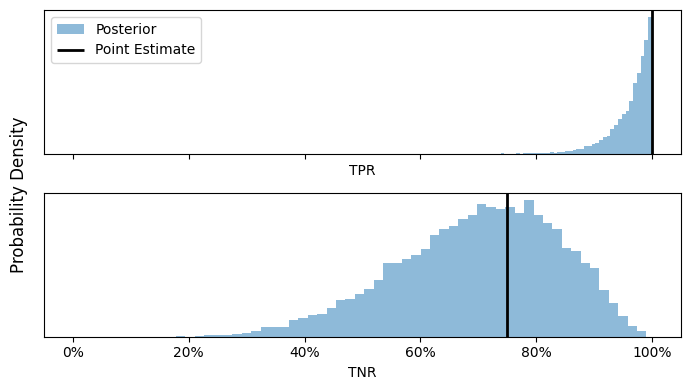

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    2,
    1,
    figsize=(7, 4),
    sharex=True,
)

# TPR ==========================================================================
tpr_samples = study.get_metric_samples(
    metric="tpr",
    experiment_name="7a/7a",
    sampling_method="posterior",
).values[:, 0]

tpr_point_estimate = study.get_metric_samples(
    metric="tpr",
    experiment_name="7a/7a",
    sampling_method="input",
).values[:, 0]

ax[0].hist(tpr_samples, bins=50, alpha=0.5, density=True, label="Posterior")

cur_ylim = ax[0].get_ylim()
ax[0].vlines(
    tpr_point_estimate,
    cur_ylim[0],
    cur_ylim[1],
    color="black",
    linewidths=2,
    label="Point Estimate",
)
ax[0].set_ylim(cur_ylim)

ax[0].set_yticks([])

ax[0].set_xlabel("TPR")

# TNR ==========================================================================
tnr_samples = study.get_metric_samples(
    metric="tnr",
    experiment_name="7a/7a",
    sampling_method="posterior",
).values[:, 0]

tnr_point_estimate = study.get_metric_samples(
    metric="tnr",
    experiment_name="7a/7a",
    sampling_method="input",
).values[:, 0]

ax[1].hist(tnr_samples, bins=50, alpha=0.5, density=True)

cur_ylim = ax[1].get_ylim()
ax[1].vlines(tnr_point_estimate, cur_ylim[0], cur_ylim[1], color="black", linewidths=2)
ax[1].set_ylim(cur_ylim)

ax[1].set_xlabel("TNR")

# Figure =======================================================================
ax[1].set_yticks([])

ax[1].set_xlim(-0.05, 1.05)
ax[1].xaxis.set_major_formatter("{x:.0%}")

ax[0].legend()

fig.supylabel("Probability Density")

fig.tight_layout()


## Figure 3

Figure 3 in [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) displays the metric uncertainty (MU) for prevalence, the true positive rate (TPR) and the true negative rate (TNR). The figure clearly shows a negative correlation between the sample size and the metric uncertainty size for all 3 metrics (although some variation is present).

In [7]:
import prob_conf_mat

study = prob_conf_mat.Study(
    seed=0,
    num_samples=20000,
    ci_probability=0.95,
)

study.add_metric("prevalence")
study.add_metric("tpr")
study.add_metric("tnr")

for id, row in totsch_table_2_df.iterrows():
    study.add_experiment(
        experiment_name=str(id),
        confusion_matrix=[[row.TP, row.FN], [row.FP, row.TN]],
        prevalence_prior=1,
        confusion_prior=1,
    )


In [8]:
study


Study(experiments=['1/1', '10/10', '11/11', '12/12', '13a/13a', '13b/13b', '14a/14a', '14b/14b', '15a/15a', '15b/15b', '16/16', '2/2', '3/3', '4a/4a', '4b/4b', '5a/5a', '5b/5b', '6a/6a', '6b/6b', '7a/7a', '7b/7b', '8/8', '9a/9a', '9b/9b']), metrics=MetricCollection([Metric(prevalence), Metric(tpr), Metric(tnr)]))

In [9]:
mus = dict()
for metric in ["prevalence", "tpr", "tnr"]:
    metric_summaries = study.report_metric_summaries(
        metric=metric,
        class_label=0,
        table_fmt="pd",
    )

    mus[metric] = metric_summaries.MU  # type: ignore


/tmp/ipykernel_125498/2769521887.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(list(totsch_table_2_df.index), rotation=90)
/tmp/ipykernel_125498/2769521887.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


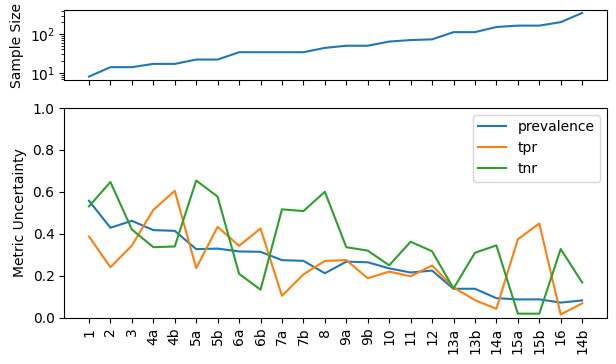

In [10]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(
    2,
    1,
    figsize=(7, 4),
    sharex=True,
    height_ratios=[1, 3],
)

# N figure =====================================================================
ax[0].plot(totsch_table_2_df.N)

ax[0].set_yscale("log")

ax[0].set_ylabel("Sample Size")

# MU figure ====================================================================
ax[1].plot(mus["prevalence"], c=cmap(0), label="prevalence")
ax[1].plot(mus["tpr"], c=cmap(1), label="tpr")
ax[1].plot(mus["tnr"], c=cmap(2), label="tnr")

ax[1].set_ylim(0, 1)

ax[1].legend()

ax[1].set_ylabel("Metric Uncertainty")

ax[1].set_xticklabels(list(totsch_table_2_df.index), rotation=90)

fig.show()


## Figure 5

Figure 5 in [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) shows the posterior distributions for the informedness metric, for all experiments in Table S2. They also compute the $r_{\text{deceptive}}$ score: the probability that the classifier achieves a score lower than 0.

In [11]:
import prob_conf_mat

study = prob_conf_mat.Study(
    seed=0,
    num_samples=20000,
    ci_probability=0.95,
)

study.add_metric("bm")

for id, row in totsch_table_2_df.iterrows():
    study.add_experiment(
        experiment_name=str(id),
        confusion_matrix=[[row.TP, row.FN], [row.FP, row.TN]],
        prevalence_prior=1,
        confusion_prior=1,
    )


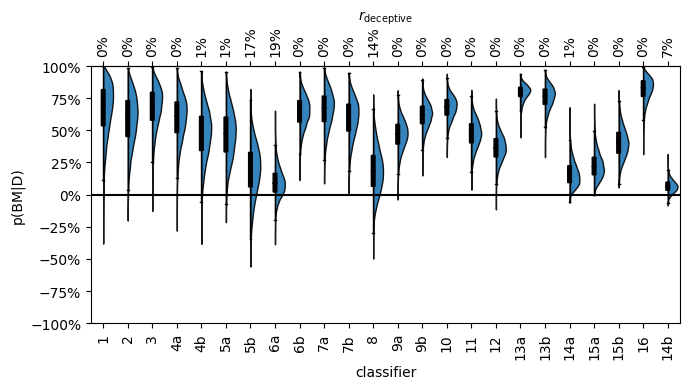

In [12]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

upper_ticks = []
for i, experiment_name in enumerate(totsch_table_2_df.index):
    metric_samples = study.get_metric_samples(
        metric="bm", experiment_name=experiment_name, sampling_method="posterior"
    )

    parts = ax.violinplot(
        metric_samples.values[:, 0],
        positions=[i],
        orientation="vertical",
        widths=0.8,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        side="high",
    )

    for pc in parts["bodies"]:  # type: ignore
        pc.set_facecolor(cmap(0))
        pc.set_edgecolor("black")
        pc.set_alpha(0.90)

    box_dict = ax.boxplot(
        metric_samples.values[:, 0],
        positions=[i],
        orientation="vertical",
        showfliers=False,
        notch=True,
        patch_artist=True,
    )

    box_dict["medians"][0].set_alpha(0)
    box_dict["boxes"][0].set_facecolor("black")

    r_deceptive = (metric_samples.values[:, 0] < 0).mean()

    upper_ticks.append(f"{r_deceptive:.0%}")

# Add the expected rewards
secx = ax.secondary_xaxis("top")

secx.set_xticks(
    range(len(upper_ticks)),
    rotation=90,
    ha="center",
    labels=upper_ticks,
)

secx.set_xlabel(f"$r_{{\\text{{deceptive}}}}$")

cur_xlim = ax.get_xlim()
ax.hlines(0, cur_xlim[0], cur_xlim[1], colors="black")

ax.set_xticklabels(totsch_table_2_df.index, rotation=90)

ax.set_ylim(-1, 1)

ax.set_ylabel("p(BM|D)")

ax.yaxis.set_major_formatter("{x:.0%}")

ax.set_xlabel("classifier")

fig.tight_layout()


## Figure 6

Figure 6 of [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) depicts the posterior distributions of the accuracy scores various classifiers on the same test data, the probability that each model achieved a certain rank when compared to all other classifiers, and the expected prize money that each classifier should have received.

Note that the expected reward differs somewhat. We attribute this to the fact that Tötsch & Hoffmann used a different probabilistic model for accuracy scores specifically, whereas we compute it indirectly from the synthetic confusion matrices. Regardless, the differences are minor at best.

In [13]:
from prob_conf_mat import Study

study = Study(
    seed=0,
    num_samples=100000,
    ci_probability=0.95,
)

study.add_metric(metric="acc")

for rank, row in totsch_table_3_df.iterrows():
    study.add_experiment(
        experiment_name=f"{rank}/{row.TeamId}",
        confusion_matrix=[[row.TP, row.FN], [row.FP, row.TN]],
        confusion_prior=1,
        prevalence_prior=1,
    )


In [14]:
study.report_listwise_comparison(metric="acc")


Group,Experiment,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
1,3467175,0.9297,0.0677,0.0025,,,,,,,
2,3394520,0.0678,0.7916,0.1264,0.0090,0.0053,,,,,
3,3338942,0.0024,0.1254,0.6522,0.1282,0.0902,0.0016,,,,
4,3339018,,0.0137,0.1659,0.4415,0.3568,0.0191,0.0012,0.0013,0.0004,
5,3338836,,0.0016,0.0502,0.3609,0.4572,0.0997,0.0120,0.0124,0.0049,0.0010
6,3429037,,,0.0026,0.0518,0.0755,0.5209,0.1282,0.1281,0.0688,0.0241
8,3338664,,,0.0001,0.0070,0.0121,0.2024,0.2622,0.2572,0.1764,0.0825
7,3346448,,,,0.0014,0.0024,0.0964,0.2524,0.2540,0.2381,0.1552
9,3338358,,,,0.0002,0.0006,0.0445,0.2099,0.2116,0.2734,0.2598
10,3339624,,,,,,0.0154,0.1341,0.1353,0.2379,0.4773


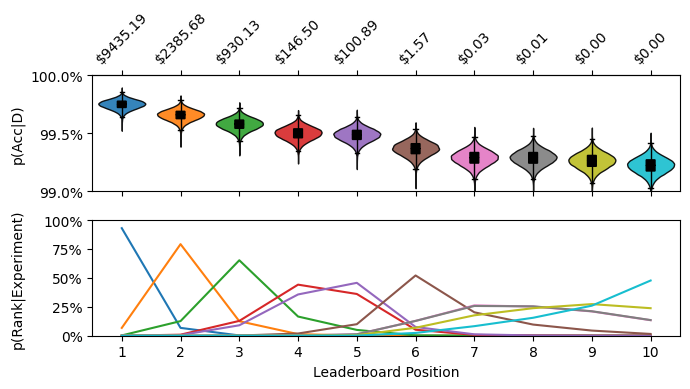

In [15]:
import numpy as np
import matplotlib.pyplot as plt

listwise_comparsion_result = study.get_listwise_comparsion_result(metric="acc")

expected_rewards = np.dot(
    listwise_comparsion_result.p_rank_given_experiment,
    np.pad(
        np.array([10000, 2000, 1000]),
        (0, listwise_comparsion_result.p_rank_given_experiment.shape[0] - 3),
    ),
)

cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(
    2,
    1,
    figsize=(7, 4),
    sharex=True,
    height_ratios=[1, 1],
)

# Axis 0: p(acc) ===============================================================
for i, experiment_name in enumerate(listwise_comparsion_result.experiment_names):
    metric_samples = study.get_metric_samples(
        metric="acc",
        experiment_name=experiment_name,
        sampling_method="posterior",
    )

    parts = ax[0].violinplot(
        metric_samples.values[:, 0],
        positions=[i],
        orientation="vertical",
        widths=0.8,
        showmeans=False,
        showmedians=False,
        showextrema=False,
    )

    for pc in parts["bodies"]:
        pc.set_facecolor(cmap(i))
        pc.set_edgecolor("black")
        pc.set_alpha(0.90)

    box_dict = ax[0].boxplot(
        metric_samples.values[:, 0],
        positions=[i],
        orientation="vertical",
        showfliers=False,
        notch=True,
        patch_artist=True,
    )

    box_dict["medians"][0].set_alpha(0)
    box_dict["boxes"][0].set_facecolor("black")

ax[0].set_ylim(0.99, 1)
ax[0].yaxis.set_major_formatter("{x:.1%}")

ax[0].set_ylabel("p(Acc|D)")

# Add the expected rewards
secx = ax[0].secondary_xaxis("top")

secx.set_xticks(
    np.arange(10),
    rotation=45,
    ha="center",
    labels=[f"${r:.2f}" for r in expected_rewards],
)

# Axis 1: p(rank|experiment) ===================================================
for i in range(listwise_comparsion_result.p_rank_given_experiment.shape[0]):
    ax[1].plot(listwise_comparsion_result.p_rank_given_experiment[i, :], c=cmap(i))

ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter("{x:.0%}")

ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(np.arange(10) + 1)
ax[1].set_xlim(-0.5, 9.5)

ax[1].set_ylabel("p(Rank|Experiment)")

ax[1].set_xlabel("Leaderboard Position")

fig.align_ylabels(ax)

fig.tight_layout()


## Figure 7

Figure 7 in [Tötsch & Hoffmann (2020)](https://peerj.com/articles/cs-398/) displays the inverse relationship of metric uncertainty and sample size. These come from simulated confusion matrices. They show that the metric uncertainty decreases according to the inverse square of the sample size.

This is a little trickier to pull of in `prob_conf_mat`, since it requires circumventing the confusion matrix validation checks. So we first define a valid study with a single experiment, then we replace the validated confusion matrix with one of our own.

/tmp/ipykernel_125498/2018670692.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(x=ns[ns <= 100], y=metric_summaries.MU[ns <= 100], c=cmap(0))  # type: ignore
/tmp/ipykernel_125498/2018670692.py:42: RuntimeWarning: divide by zero encountered in power
  pred_ys = np.pow(xs, -1 / study.num_classes)
/tmp/ipykernel_125498/2018670692.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(x=ns, y=met

Text(0.5, 0.98, 'Accuracy MU by N')

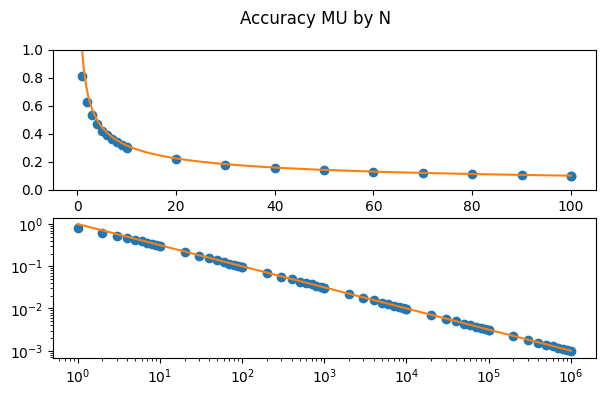

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import prob_conf_mat

study = prob_conf_mat.Study(seed=0, num_samples=20000, ci_probability=0.95)

ns = np.concatenate([np.arange(start=1, stop=10 + 1) * (10**i) for i in range(6)])
for i, val in enumerate(ns):
    conf_mat = np.full(shape=(2, 2), fill_value=val, dtype=np.int32)

    study.add_experiment(
        experiment_name=f"{i}",
        confusion_matrix=conf_mat,
        prevalence_prior=0,
        confusion_prior=0,
    )

study.add_metric("acc")


metric_summaries = study.report_metric_summaries(
    metric="acc",
    class_label=0,
    table_fmt="pd",
)


cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7, 4),
    # height_ratios=[1, 3],
)

# N figure
ax[0].scatter(x=ns[ns <= 100], y=metric_summaries.MU[ns <= 100], c=cmap(0))  # type: ignore

xs = np.linspace(0, 100, num=1000)
pred_ys = np.pow(xs, -1 / study.num_classes)

ax[0].plot(xs, pred_ys, c=cmap(1))

ax[0].set_ylim(0, 1)

# ax[0].set_yscale("log")
# plt.scatter(x=ns[ns <= 100], y=)

ax[1].scatter(x=ns, y=metric_summaries.MU, c=cmap(0))  # type: ignore

xs = np.linspace(1, max(ns), num=1000)
pred_ys = np.pow(xs, -1 / study.num_classes)

ax[1].plot(xs, pred_ys, c=cmap(1))

ax[1].set_xscale("log")
ax[1].set_yscale("log")

fig.suptitle("Accuracy MU by N")
